In [1]:
import time 
time.sleep(4000)

In [2]:
from mdagent import MDAgent

In [3]:
#todays date and time
import datetime

start = datetime.datetime.now()
date = start.strftime("%Y-%m-%d")
print("date:",date)
time = start.strftime("%H:%M:%S")
print("time:",time)

date: 2024-07-11
time: 01:30:00


In [4]:
model='gpt-4o'

In [5]:
mda = MDAgent(
    agent_type='Structured', 
    model=model, 
    tools_model=model,
    use_memory=False, 
    top_k_tools="all"
)

print("LLM: ", mda.llm.model_name,"\nTemperature: ", mda.llm.temperature)

LLM:  gpt-4o 
Temperature:  0.1


In [6]:
prompt = '''Simulate protein 1ZNI at 300K for 1ns and calculate RMSD.'''
answer = mda.run(prompt)

Thought: To simulate the protein 1ZNI at 300K for 1ns and calculate the RMSD, I will first need to download the PDB file for 1ZNI. Then, I will set up and run the simulation using the specified parameters. Finally, I will calculate the RMSD from the resulting trajectory.

Action:
```
{
  "action": "PDBFileDownloader",
  "action_input": {
    "query": "1ZNI"
  }
}
```PDB file found with this ID: 1ZNI


2024-07-11 01:30:04.020 
  command:

    streamlit run /Users/jorgemedina/miniforge3/envs/mdagent2/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


To proceed with the simulation of protein 1ZNI at 300K for 1ns and calculate the RMSD, I will now set up and run the simulation using the downloaded PDB file. After the simulation, I will calculate the RMSD from the resulting trajectory.

Action:
```
{
  "action": "SetUpandRunFunction",
  "action_input": {
    "pdb_id": "1ZNI_013004",
    "forcefield_files": [],
    "save": true,
    "system_params": {
      "nonbondedMethod": "PME",
      "nonbondedCutoff": "1 * nanometers",
      "ewaldErrorTolerance": 0.0005,
      "constraints": "HBonds",
      "rigidWater": true,
      "constraintTolerance": 0.00001,
      "solvate": true
    },
    "integrator_params": {
      "integrator_type": "LangevinMiddle",
      "Temperature": "300 * kelvin",
      "Friction": "1.0 / picoseconds",
      "Timestep": "0.002 * picoseconds",
      "Pressure": "1.0 * bar"
    },
    "simulation_params": {
      "Ensemble": "NPT",
      "Number of Steps": 500000,
      "record_interval_steps": 5000,
      "recor

In [7]:
end = datetime.datetime.now()
elapsed = end - start
print(f"duration: {elapsed.total_seconds()/60:.2f} minutes")

duration: 367.39 minutes


# Confirm that the file was downloaded and the counts were correct

In [8]:
registry = mda.path_registry
all_names = registry.list_path_names()
print(all_names)

Names found in registry: 1ZNI_013004, 1ZNI_013020, top_sim0_013025, top_sim0_015125, sim0_015125, rec0_015127, rec1_015127, rec2_015127, rmsd_015125, fig0_073719


In [9]:
# ensure all files are in path registry
assert all(n in all_names for n in ['1ZNI', 'rmsd', 'sim0', 'top_sim0', 'fig0']), "Not all file ids are present in path registry"

In [10]:
# let's see if we can't grab the plot
import re
import os
match = re.search(rf"fig0_\d+", all_names)
plot_path = registry.get_mapped_path(match.group(0))
assert os.path.exists(plot_path)

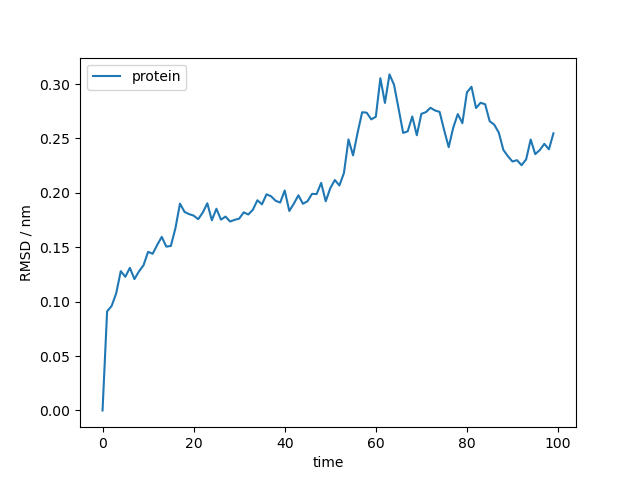

In [11]:
from IPython.display import Image
plot_path = registry.get_mapped_path('fig0_073719')
Image(filename=plot_path)

# Experiment Result:
### Completed without Exception or TimeOut Errors ✅
### Attempted all necessary steps ✅
### Logic make sense ✅
### Correct Answer  ✅